Python is very extensible.  For adding functionality we often load (import) packages to extend the capabilities of python.

In [16]:
%matplotlib inline
import numpy as np # allows us to access linear algebra capabilities
import pandas as pd # pandas data manipulation library
import matplotlib.pyplot as plt # python's matlab'esque graphics library
from scipy.stats import norm # full suite of normal pdf, cdf, etc from scipy
import statsmodels.formula.api as smf # estimate OLS using R style formulas
import seaborn as sbn #adds some nice plotting functionality

plt.style.use('ggplot') # ggplot style for matplotlib

Setting defining and viewing a python variable:

In [17]:
a = 1
print(a)


1


Setting and viewing a python list:

In [18]:
b = [1,2,3]
print(b)

[1, 2, 3]


In [19]:
type(b)

list

Defining a numpy array (this is like a vector in linear algebra)

In [20]:
x_vector = np.array(b)
type(x_vector)


numpy.ndarray

In [21]:
print(len(x_vector))

3


In [22]:
x_vector.shape

(3,)

Combining arrays into matrices:

In [23]:
b_ = np.c_[x_vector,np.array(b)]
b_

array([[1, 1],
       [2, 2],
       [3, 3]])

In [25]:
b_.shape

3

In [26]:
print(b_.shape[0],b_.shape[1])

3 2


# Linear Algebra Primer

## Scalar Addition
\begin{equation}
    A+3=\begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}+3
    =\begin{bmatrix}
      a_{11}+3 & a_{12}+3 \\
      a_{21}+3 & a_{22}+3
    \end{bmatrix}
\end{equation}
The same basic principle holds true for A-3.

## Scalar to Matrix Addition

In [27]:
A = b_.copy()
A

array([[1, 1],
       [2, 2],
       [3, 3]])

In [28]:
result = A + 3
result

array([[4, 4],
       [5, 5],
       [6, 6]])

## Matrix to Matrix Addition

\begin{equation}
    A - B =\begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix} -
    \begin{bmatrix} b_{11} & b_{12} \\
      b_{21} & b_{22}
    \end{bmatrix}=
    \begin{bmatrix}
      a_{11}-b_{11} & a_{12}-b_{12} \\
      a_{21}-b_{21} & a_{22}-b_{22}
    \end{bmatrix}
\end{equation}

In [29]:
B = norm(0,1).rvs(10000)
print(B,len(B))

[ 2.72049429 -0.57871701  0.98880755 ...  0.61325572 -0.15112498
  0.65014605] 10000


In [30]:
A + B

ValueError: operands could not be broadcast together with shapes (3,2) (10000,) 

In [32]:
B = norm(0,1).rvs((3,2))
A + B

array([[0.99627164, 0.27651546],
       [3.16785586, 2.44881734],
       [2.68963601, 0.58767755]])

## Matrix Multiplication

### Scalar to Matrix Multiplication

\begin{equation}
    3 \times A = 3 \times \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}=
    \begin{bmatrix}
      3a_{11} & 3a_{12} \\
      3a_{21} & 3a_{22}
    \end{bmatrix}= A \times 3
\end{equation}
Scalar multiplication is commutative, so that $3 \times A$=$A \times 3$. Notice that the product is defined for a matrix A of any dimension.

In [33]:
A*3

array([[3, 3],
       [6, 6],
       [9, 9]])

### Matrix to Matrix Multiplication

Alternatively, consider a matrix C of dimension $2 \times 2$ and a matrix A of dimension $3 \times 2$

\begin{equation}
    A_{3 \times 2}=\begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22} \\
      a_{31} & a_{32}
    \end{bmatrix}_{3 \times 2}
    ,
    C_{2 \times 2} =
    \begin{bmatrix}
          c_{11} & c_{12} \\
          c_{21} & c_{22} \\
    \end{bmatrix}_{2 \times 2}
\end{equation}
Here, A $\times$ C is

\begin{align}
    A_{3 \times 2} \times C_{2 \times 2}=&
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22} \\
      a_{31} & a_{32}
    \end{bmatrix}_{3 \times 2}
    \times
    \begin{bmatrix}
      c_{11} & c_{12} \\
      c_{21} & c_{22}
    \end{bmatrix}_{2 \times 2} \\
    =&
    \begin{bmatrix}
      a_{11} c_{11}+a_{12} c_{21} & a_{11} c_{12}+a_{12} c_{22} \\
      a_{21} c_{11}+a_{22} c_{21} & a_{21} c_{12}+a_{22} c_{22} \\
      a_{31} c_{11}+a_{32} c_{21} & a_{31} c_{12}+a_{32} c_{22} 
    \end{bmatrix}_{3 \times 2}
\end{align}

So in general, $X_{r_x \times c_x} \times Y_{r_y \times c_y}$ we have two important things to remember:

1. For conformability in matrix multiplication, $c_x=r_y$, or the columns in the first operand must be equal to the rows of the second operand.
2. The result will be of dimension $r_x \times c_y$, or of dimensions equal to the rows of the first operand and columns equal to columns of the second operand.

In [34]:
C = norm(0,1).rvs((2,2))
C

array([[ 1.02615947, -1.17124237],
       [-0.74181362, -0.12319283]])

In [36]:
A*A

array([[1, 1],
       [4, 4],
       [9, 9]])

In [37]:
result = np.dot(A,C)
result

array([[ 0.28434585, -1.2944352 ],
       [ 0.5686917 , -2.58887039],
       [ 0.85303754, -3.88330559]])

In [38]:
A.dot(C)

array([[ 0.28434585, -1.2944352 ],
       [ 0.5686917 , -2.58887039],
       [ 0.85303754, -3.88330559]])

In [40]:
np.dot(C,A)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

The following code performs element-wise multiplication and requires equally sized matrices (rows and columns the same).  Here it isn't going to work:

This performs the matrix multiplication operation:

But if we transpose $\mathbf{A}$, the matrix multiplication result exists:

In [41]:
np.dot(C,A.T)

array([[-0.1450829 , -0.2901658 , -0.4352487 ],
       [-0.86500645, -1.7300129 , -2.59501934]])

# Slicing

Slicing is numpy speak for extracting pieces of an array.

## Slicing elements of array

In [49]:
#A
A = np.arange(6).reshape((3,2))
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [43]:
A[1,1]

2

## Slicing rows

Some important points to consider about indexing in python:
1. Python begins indexing by 0 rather than 1
2. You can index the last row or column by using -1 (or the next to last by using -2, and so on)

In [44]:
A[0,:]

array([1, 1])

## Slicing columns

In [45]:
A[:,1]

array([1, 2, 3])

Here is the last column

In [46]:
A[:,-1]

array([1, 2, 3])

Here is the last element

In [50]:
A[-1,-1]

5

## Slicing ranges

In [51]:
A[0:]

array([[0, 1],
       [2, 3],
       [4, 5]])

In [52]:
A[1:]

array([[2, 3],
       [4, 5]])

In [53]:
A[1:,:1]

array([[2],
       [4]])

or,

In [54]:
A[1:,:-1]

array([[2],
       [4]])

# Logical Addressing

A useful feature of our numpy arrays is that we can do logical addressing, which means we can slice values of an array using values of the array itself (or other arrays).

In [55]:
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [56]:
#find rows in A where column 2 is >1
A[:,1]>1

array([False,  True,  True])

In [57]:
A[A[:,1]>1]

array([[2, 3],
       [4, 5]])

In [59]:
A[(A[:,1]>1) & (A[:,1]<5)]

array([[2, 3]])

## Looping

In [60]:
A = norm(50,5).rvs((100,2))
print("Shape of A is", A.shape)

Shape of A is (100, 2)


In [61]:
for rows in A:
    print(rows)

[58.72455841 49.213388  ]
[52.64062028 43.94014478]
[57.36022987 49.20863778]
[48.91404472 44.2581577 ]
[48.50304852 48.18990993]
[57.27798766 47.73159282]
[45.51749787 51.25941546]
[57.86896298 52.81193107]
[51.41459164 53.0472318 ]
[50.55917852 39.8526913 ]
[42.52224896 49.8275063 ]
[47.44054035 49.1556138 ]
[47.03562933 54.32923158]
[58.23125719 54.31851191]
[47.48010028 52.40746164]
[45.2395754  49.03395471]
[45.35138814 52.66052951]
[54.23147626 46.66618002]
[44.21081204 45.62945709]
[46.00856275 49.18312417]
[55.26791415 46.25845163]
[45.46642546 50.75924203]
[50.61941313 39.72233529]
[53.59437349 46.47290203]
[52.14977111 48.57373969]
[51.54870181 48.10174086]
[50.86251908 58.56751194]
[51.91145065 43.2721791 ]
[51.32193013 50.09971179]
[43.26740558 46.7389493 ]
[55.41662836 51.91773764]
[50.75562845 49.13496722]
[51.4327363 47.8059772]
[51.6864076  48.51405257]
[50.59868878 49.0160415 ]
[51.58592679 52.67566296]
[45.21382275 55.29867325]
[53.70918379 48.88252708]
[50.15201689 4

In [62]:
for cols in A.T:
    print(cols)

[58.72455841 52.64062028 57.36022987 48.91404472 48.50304852 57.27798766
 45.51749787 57.86896298 51.41459164 50.55917852 42.52224896 47.44054035
 47.03562933 58.23125719 47.48010028 45.2395754  45.35138814 54.23147626
 44.21081204 46.00856275 55.26791415 45.46642546 50.61941313 53.59437349
 52.14977111 51.54870181 50.86251908 51.91145065 51.32193013 43.26740558
 55.41662836 50.75562845 51.4327363  51.6864076  50.59868878 51.58592679
 45.21382275 53.70918379 50.15201689 49.48367824 51.31213031 54.5279171
 54.73396975 40.99820234 50.1042295  44.44966847 43.84709288 58.59981803
 57.23479539 41.29367085 51.99977695 52.29915611 56.30549666 54.00629165
 53.13454334 53.55053803 47.71253886 57.42025882 40.92306009 48.74999336
 45.94349787 44.33134597 52.67646775 44.00660295 55.35800772 53.34244103
 48.71977528 59.52814746 57.04357986 56.41959055 59.98932146 51.66594475
 44.66576849 44.63221683 49.46394159 51.85766319 50.69725106 45.90980205
 44.0953071  54.04681355 45.57512738 46.72766789 58.

In [63]:
#while loop
z = 0
while z<5:
    print(z)
    z +=1

0
1
2
3
4


# Statistical Functions

Here we'll explore CDF's and PDF's.

# Monty Hall Simulation

In [64]:
#Import the libraries  
#Source: medium.com
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Have the player switch to the other unopened door
def switch_function(shown_door, num_doors, player_choice):
  i = 1
  while (i == shown_door or i== player_choice ):
    i = (i+1)%(num_doors)
  
  return i

#The host will reveal a door that doesn't contain the prize
#Remember the host knows the door that the prize is behind
def get_non_prize_door(host, num_doors, player_choice):
  i = 1
  while (i == host or i== player_choice ):
    i = (i+1)%(num_doors)
  
  return i

def monty_hall_game(switch, num_tests):
  win_switch_cnt = 0
  win_no_switch_cnt = 0
  lose_switch_cnt = 0
  lose_no_switch_cnt = 0
  doors = [0,1,2] #Get the doors
  num_doors = len(doors) #Get the number of doors
  
  
  for i in range(0,num_tests):
    door_with_prize = random.randint(0, num_doors-1) #Randomly choose the door with the wanted prize
    host = door_with_prize #The host knows which door has the prize
    #The player chooses initially a random door that s/he believes has the prize
    player_choice = random.randint(0, num_doors-1) 
    original_player_choice = player_choice
    shown_door = get_non_prize_door(host, num_doors, player_choice)
    if switch == True:
      player_choice = switch_function(shown_door,num_doors, player_choice)
    
    if player_choice == host and switch == False:
      #Then the player wins from not switching
      print('Player Wins (No switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice ,', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      win_no_switch_cnt = win_no_switch_cnt + 1
    elif player_choice == host and switch == True:
      #Then the player wins from switching
      print('Player Wins (switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      win_switch_cnt = win_switch_cnt +1
    elif player_choice != host and switch == False:
      #The player lost from not switching
      print('Player Lost (No switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      lose_no_switch_cnt = lose_no_switch_cnt + 1
    elif player_choice != host and switch == True:
      #The player lost from switching
      print('Player Lost (switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      lose_switch_cnt = lose_switch_cnt + 1
    else:
      print('SOMETHING IS WRONG')

  return win_no_switch_cnt,win_switch_cnt,lose_no_switch_cnt,lose_switch_cnt, num_tests

In [68]:
#Play the game
x = monty_hall_game(True, 10)
print(x)
print('Win switch %: ', x[1]/ x[4])
print('Lose switch %: ', x[3]/ x[4])

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

In [13]:
num_tests = []
win_percentage = []
switch = True
for i in range(1,200):
  num_tests.append(i) 
  y = monty_hall_game(switch, i) 
  win_percentage.append(y[1]/ y[4]) 

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The p

Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The p

Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The p

Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The player chose door:  1  Original choice:  0 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Lost (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Wins (switch) - The p

Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  1  Original choice:  2 , Door with prize: 1 , Shown Door:  0
Player Wins (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 2 , Shown Door:  1
Player Wins (switch) - The player chose door:  2  Original choice:  1 , Door with prize: 2 , Shown Door:  0
Player Lost (switch) - The player chose door:  2  Original choice:  0 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 0 , Shown Door:  2
Player Lost (switch) - The player chose door:  0  Original choice:  1 , Door with prize: 1 , Shown Door:  2
Player Wins (switch) - The player chose door:  0  Original choice:  2 , Door with prize: 0 , Shown Door:  1
Player Wins (switch) - The p

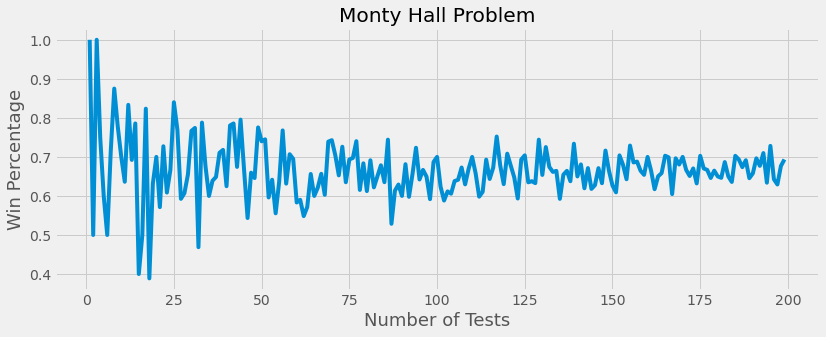

In [69]:
#Visually Show The Number of Tests and the Win Percentage From Switching
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( num_tests, win_percentage  )
plt.title('Monty Hall Problem')
plt.xlabel('Number of Tests',fontsize=18)
plt.ylabel('Win Percentage',fontsize=18)
plt.show()